Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv(r'C:\Users\HP\Downloads\Major Project\Major\heart_disease_data.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0 = no disease; 1 = disease

In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> With disease

0 --> Without disease

Splitting the Features and Target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Random Forest

Accuracy of the Random Forest model: 92.07920792079209


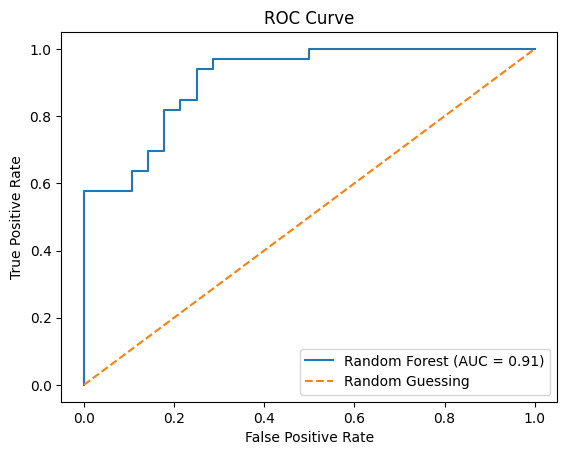

In [15]:
# Split the dataset into features and target variable
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Feature selection
selector = SelectKBest(f_classif, k=10)
X = selector.fit_transform(X, y)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfc, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X, y)

# Train the model on the entire dataset with the best hyperparameters
rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc.fit(X, y)

# Evaluate the accuracy of the model
y_pred = rfc.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Accuracy of the Random Forest model:', accuracy* 100)

rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred_prob = rfc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Calculate the AUC for the ROC curve
auc = roc_auc_score(Y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

XGBOOST

Accuracy of the XGBoost model: 89.76897689768977


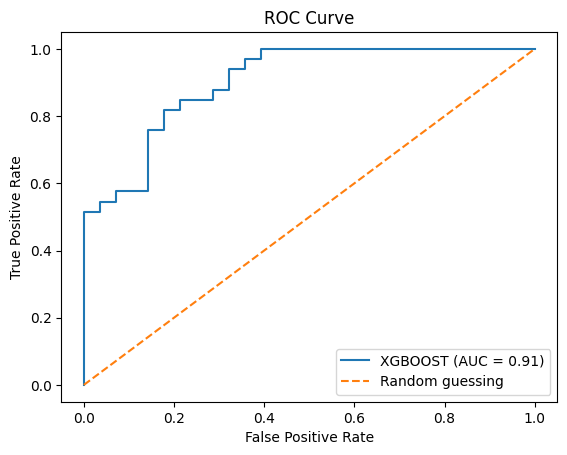

In [16]:
# Feature selection
selector = SelectKBest(f_classif, k=10)
X = selector.fit_transform(X, y)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

xgb_clf = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5)
grid_search.fit(X, y)

# Train the model on the entire dataset with the best hyperparameters
xgb_clf = xgb.XGBClassifier(**grid_search.best_params_, random_state=42)
xgb_clf.fit(X, y)

# Evaluate the accuracy of the model
y_pred = xgb_clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Accuracy of the XGBoost model:', accuracy*100)


xgb_clf.fit(X_train, Y_train)

y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='XGBOOST (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

LIGHTGBM

Accuracy of the LightGBM model: 90.42904290429043


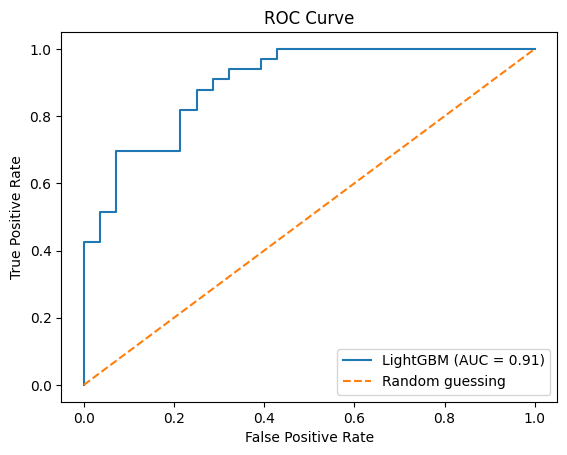

In [17]:
# Feature selection
selector = SelectKBest(f_classif, k=10)
X = selector.fit_transform(X, y)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [1, 5, 10],
}

lgbm = lgb.LGBMClassifier(random_state=42)
grid_search = GridSearchCV(lgbm, param_grid, cv=5)
grid_search.fit(X, y)

# Train the model on the entire dataset with the best hyperparameters
lgbm = lgb.LGBMClassifier(**grid_search.best_params_, random_state=42)
lgbm.fit(X, y)

# Evaluate the accuracy of the model
y_pred = lgbm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Accuracy of the LightGBM model:', accuracy*100)

lgbm.fit(X_train, Y_train)

y_pred_prob = lgbm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='LightGBM (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

SVC

Accuracy of the SVM model: 90.42904290429043


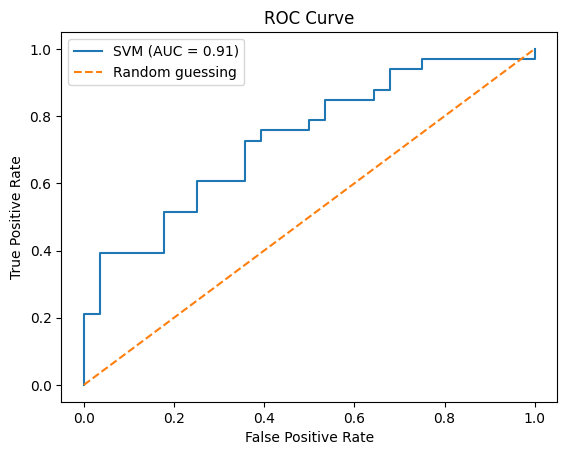

In [18]:
# Feature selection
selector = SelectKBest(f_classif, k=10)
X = selector.fit_transform(X, y)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'probability': [True]
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X, y)

# Train the model on the entire dataset with the best hyperparameters
svm = SVC(**grid_search.best_params_, random_state=42)
svm.fit(X, y)

# Evaluate the accuracy of the model
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Accuracy of the SVM model:', accuracy*100)


svm.fit(X_train, Y_train)

y_pred_prob = svm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Logistic Regression

Accuracy of the Logistic Regression model: 85.14851485148515


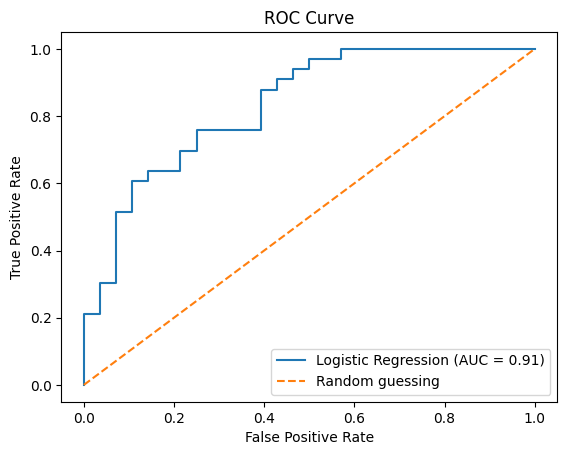

In [19]:
# Feature selection
selector = SelectKBest(f_classif, k=10)
X = selector.fit_transform(X, y)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Regularization
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X, y)

# Train the model on the entire dataset with the best hyperparameters
logreg = LogisticRegression(**grid_search.best_params_, penalty='l1', solver='saga', max_iter=10000)
logreg.fit(X, y)

# Evaluate the accuracy of the model
y_pred = logreg.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Accuracy of the Logistic Regression model:', accuracy*100)


logreg.fit(X_train, Y_train)

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Model to be Used

In [20]:
model = RandomForestClassifier()

In [21]:
# training the Random forest model with Training data
model.fit(X_train, Y_train)

RandomForestClassifier()

Building a Predictive System

In [22]:
input_data = (52,1,0,128,255,0,1,161,1,0,2,1,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
